# Prioritization and testing of hypotheses to increase the revenue of an online store

## Project description

Together with the marketing department, a list of hypotheses was prepared to increase the revenue of the online store. The task is to prioritize hypotheses, as well as analyze the results of the A/B test.

**Data description**

**hypothesis.csv**
- Hypothesis — a brief description of the hypothesis;
- Reach — user coverage on a 10-point scale;
- Impact — impact on users on a 10-point scale;
- Confidence — confidence in the hypothesis on a 10-point scale;
- Efforts — the cost of resources to test the hypothesis on a 10-point scale.

**orders.csv**
- TransactionID — order ID;
- visitorID — ID of the user who made the order;
- date — the date when the order was made;
- revenue — order revenue;
- group — the A/B test group that the order fell into.

**visitors.csv**
- date — date;
- group — A/B test group;
- visitors — the number of users on the specified date in the specified A/B test group.

## Data preparation

In [1]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import datetime as dt

In [2]:
#reading datasets
hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')
orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv', parse_dates=['date'])
visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv', parse_dates=['date'])

#remember the preset length of the string and reset this restriction
preset_colwidth = pd.get_option('display.max_colwidth')
pd.set_option('display.max_colwidth', None)

display(hypothesis)
display(orders.head())
display(visitors.head())

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Converting column names in tables **hypothesis** and **orders** to snake_case:

In [3]:
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

In [4]:
orders = orders.rename(columns = {'transactionId':'transaction_id', 'visitorId':'visitor_id'})
orders.columns

Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')

# Part 1. Prioritization of hypotheses

Let's look at the parameters of the hypotheses:

In [5]:
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Let's apply frameworks **ICE** and **RICE**:

\begin{equation}
\textbf{ICE} = \frac{Impact * Confidence}{Efforts}
\end{equation}

\begin{equation}
\textbf{RICE} = \frac{Rearch * Impact * Confidence}{Efforts}
\end{equation}

In [6]:
hypothesis['ICE'] = round(
    (hypothesis['impact'] 
     * hypothesis['confidence']) 
    / hypothesis['efforts'], 2)

hypothesis['RICE'] = round(
    (hypothesis['reach'] 
     * hypothesis['impact'] 
     * hypothesis['confidence']) 
    / hypothesis['efforts'], 2)

display(hypothesis[['hypothesis', 'ICE']].sort_values(
    by='ICE', ascending=False).style.background_gradient(cmap ="coolwarm"))

display(hypothesis[['hypothesis', 'RICE']].sort_values(
    by='RICE', ascending=False).style.background_gradient(cmap ="coolwarm"))

#returning the preset string length
pd.set_option('display.max_colwidth', preset_colwidth)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.330000
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.330000
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.120000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.000000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.000000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.000000
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.000000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.000000


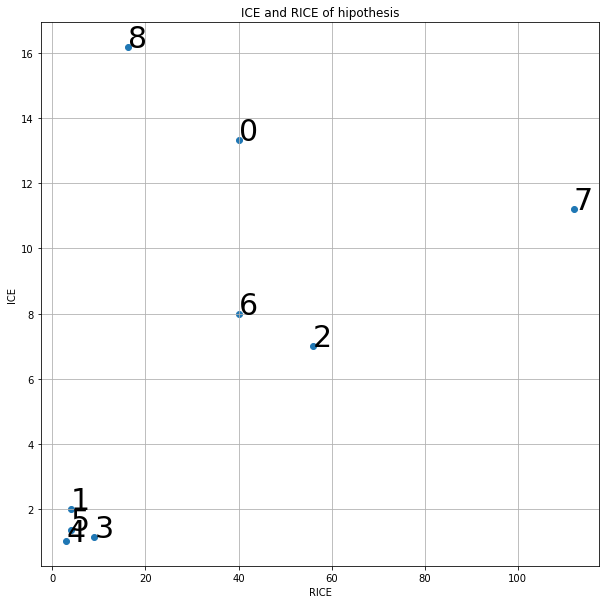

In [7]:
y = hypothesis['ICE'] 
z = hypothesis['RICE'] 
n = hypothesis.index 

fig, ax = plt.subplots()
ax.scatter(z, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]), size=30)

plt.title("ICE and RICE of hipothesis") 
plt.xlabel("RICE") 
plt.ylabel("ICE")
plt.grid()    

fig.set_figheight(10)
fig.set_figwidth(10) 
plt.show()    

The best values of **ICE** for hypotheses:

8 - Launch a promotion giving a discount on a product on your birthday
0 - Add two new traffic channels, which will attract 30% more users
7 - Add a subscription form to all the main pages to collect a customer base for email newsletters

At the same time, taking into account the audience coverage assessment, hypotheses have priority according to **RICE**:

7 - Add a subscription form to all the main pages to collect a customer base for email newsletters
2 - Add product recommendation blocks to the online store's website to increase conversion and average order receipt
0 - Add two new traffic channels, which will attract 30% more users
6 - Show banners with current promotions and sales on the main page to increase conversion

If you choose a hypothesis for conducting an A/B test, taking into account the audience coverage, hypothesis 7 should be considered as a priority: **Add a subscription form to all the main pages in order to collect a customer base for email newsletters**

# Part 2. Analysis of the A/B test

## Data preprocessing

Let's check the tables for matching data types and empty values.

In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [9]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Let's check the tables for obvious duplicates:

In [10]:
orders.duplicated().sum()

0

In [11]:
visitors.duplicated().sum()

0

No obvious duplicates were found. Let's check the orders table for the uniqueness of the purchase ID and user ID:

In [12]:
orders['transaction_id'].duplicated().sum()

0

In [13]:
orders['visitor_id'].duplicated().sum()

166

The non-uniqueness of user IDs is most likely due to the fact that each user can have several unique purchases. Let's output the first 10 rows of the orders table for non-unique users to make sure of this.

In [14]:
visitors_id_duplicated = orders[orders['visitor_id'].duplicated()]['visitor_id'].unique()

orders.query('visitor_id in @visitors_id_duplicated').sort_values(by='visitor_id').head(10)

,transaction_id,visitor_id,date,revenue,group
71,3679129301,8300375,2019-08-01,10510,B
703,4293855558,8300375,2019-08-07,1790,A
1102,1941707234,199603092,2019-08-12,6438,A
823,2971973105,199603092,2019-08-27,2790,A
134,62794304,199603092,2019-08-22,6976,A
26,2223239646,199603092,2019-08-15,3488,A
246,437656952,199603092,2019-08-02,3488,B
1013,83566152,232979603,2019-08-31,60,A
1009,2670069237,232979603,2019-08-31,2640,B
1097,3357467820,237748145,2019-08-12,340,A


Each user can have several unique purchases.

We see that in each purchase, the user fell into either group A or group B. Let's find out how many users are in both group A and group B and their share of the total number of users:

In [15]:
visitors_ab_count = len(orders.groupby('visitor_id').agg({'group':'nunique'}).query('group > 1'))

print('Users who fall into both groups:', visitors_ab_count)
print('Share of the total number of unique users:', round(visitors_ab_count / len(orders['visitor_id'].unique()), 3))

Users who fall into both groups: 58
Share of the total number of unique users: 0.056


There are 5.6% of such users, but it is not possible to delete them, since the **visitors** table contains data about users already accumulated.

Let's check which groups are in the A/B test in the dataframe **visitors**:

In [16]:
print('Groups in visitors:', visitors['group'].unique())

Groups in visitors: ['A' 'B']


Let's see which groups are in the dataframe **orders** and how many unique users are in each group:

In [17]:
groups_users_num = orders.groupby('group').agg({'visitor_id':['nunique', 'count']})
groups_users_num.columns = ['buyers_unique', 'buyers_all']
groups_users_num = (groups_users_num.join(visitors.groupby('group').agg({'visitors':'sum'}))
                    .T.sort_values(by='A', ascending=False))
groups_users_num['A/B'] = round(groups_users_num['A'] / groups_users_num['B'], 2)
groups_users_num['Total'] = groups_users_num['A'] + groups_users_num['B']

display(groups_users_num)

group,A,B,A/B,Total
visitors,18736,18916,0.99,37652
buyers_all,557,640,0.87,1197
buyers_unique,503,586,0.86,1089


Groups A and B are equally distributed by visits, and the ratio has shifted among unique buyers: group B has 14% more unique buyers.

Output the start and end dates of the test:

In [18]:
print('First visit data:', visitors['date'].dt.date.min())
print('First order data:', orders['date'].dt.date.min())
print('Last visit data:', visitors['date'].dt.date.max())
print('Last order data:', orders['date'].dt.date.max())

First visit data: 2019-08-01
First order data: 2019-08-01
Last visit data: 2019-08-31
Last order data: 2019-08-31


The test dates are from August 1 to August 31, 2019.

## Analysis of test results

### Cumulative revenue by group

In [19]:
# array of unique pairs of date values and test groups
dates_groups = orders[['date','group']].drop_duplicates() 

orders_aggregated = dates_groups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
    .agg({'date' : 'max',
          'group' : 'max',
          'transaction_id' : 'nunique',
          'visitor_id' : 'nunique',
          'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitors_aggregated = dates_groups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
    .agg({'date' : 'max',
          'group' : 'max',
          'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# combining cumulative data in a single table
cumulative_data = orders_aggregated.merge(visitors_aggregated,
                                          left_on=['date', 'group'],
                                          right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulative_data.head(5)) 

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


Let's check the dates in the dataframe to see if they match the original data:

In [20]:
print('MIN:', cumulative_data['date'].dt.date.min())
print('MAX:', cumulative_data['date'].dt.date.max())

MIN: 2019-08-01
MAX: 2019-08-31


The dates match, the dataframe is created correctly.

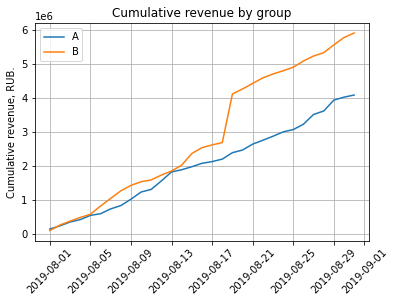

In [21]:
# cumulative number of orders and revenue by day, group A
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]

# cumulative number of orders and revenue by day, group B
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

# revenue schedule in groups A, B
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')

plt.title('Cumulative revenue by group')
plt.xticks(rotation=45)
plt.legend() 
plt.ylabel('Cumulative revenue, RUB.')
plt.grid(True)
plt.show()

Cumulative revenue in Group B has become higher over time than in Group A and increased sharply at the point from August 17 to August 20, which may indicate either a surge in the number of orders or the presence of outliers in the sample in the form of expensive orders.

### AOV (average order value) by group

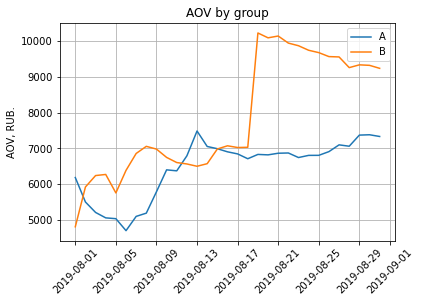

In [22]:
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='B')
plt.xticks(rotation=45)
plt.title('AOV by group')
plt.legend()
plt.ylabel('AOV, RUB.')
plt.grid(True)
plt.show()

The cumulative average check values in the groups stabilized by mid-August, but on the same dates as the jump in the previous graph, we see a sharp increase in the average check in group B. After this jump, the values of the cumulative average check in group B decrease, which again indicates the need to examine the data for the presence of outliers.

Let's plot the relative change of the cumulative average check of group B to group A:

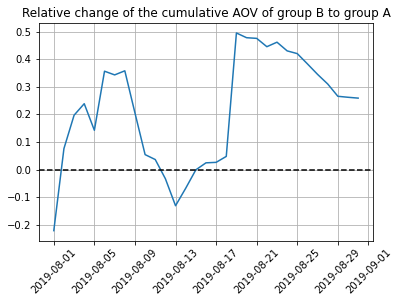

In [23]:
# combining the group tables
merged_cumulative_revenue = cumulative_revenue_a.merge(cumulative_revenue_b,
                                                       left_on='date',
                                                       right_on='date',
                                                       how='left',
                                                       suffixes=['A', 'B'])

# graph of the ratio of AOV
plt.plot(merged_cumulative_revenue['date'], \
         (merged_cumulative_revenue['revenueB']/merged_cumulative_revenue['ordersB'])\
         /(merged_cumulative_revenue['revenueA']/merged_cumulative_revenue['ordersA'])-1)
plt.grid(True)
plt.axhline(y=0, color='black', linestyle='--') 
plt.xticks(rotation=45)
plt.title('Relative change of the cumulative AOV of group B to group A')
plt.show()

At several points, the graph of the difference between the segments changes dramatically, which, again, indicates outliers.

### Cumulative average number of orders by group

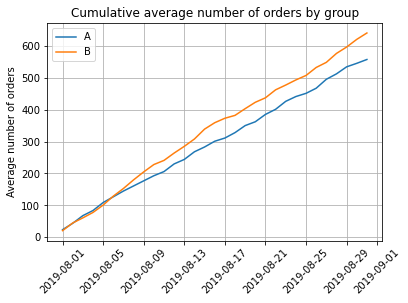

In [24]:
# group A
cumulative_data_a = cumulative_data[cumulative_data['group']=='A']

# group B
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']

plt.plot(cumulative_data_a['date'], cumulative_data_a['orders'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['orders'], label='B')
plt.legend()
plt.xticks(rotation=45)
plt.ylabel('Average number of orders')
plt.title('Cumulative average number of orders by group')
plt.grid(True)
plt.show()

The cumulative average number of orders in Group B grew slower than Group A for the first five days, then group B began to show better results, by the end of the month ahead of Group A by about 100 orders

Let's plot the relative change in the cumulative average number of orders of group B to group A:

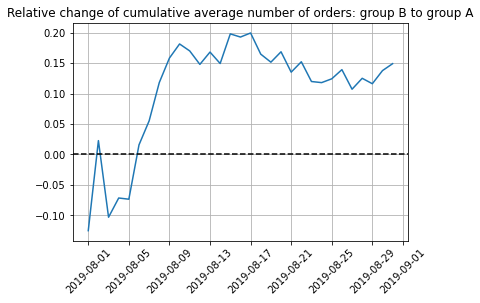

In [25]:
# merging tables
merged_cumulative_data = cumulative_data_a.merge(cumulative_data_b,
                                                 left_on='date', 
                                                 right_on='date', 
                                                 how='left', 
                                                 suffixes=['A', 'B'])

# relative change of cumulative average number of orders: group B to group A
plt.plot(merged_cumulative_data['date'], (merged_cumulative_data['ordersB']/merged_cumulative_revenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--') 
plt.xticks(rotation=45)
plt.grid(True)
plt.title('Relative change of cumulative average number of orders: group B to group A')
plt.show()

At the beginning of the test, group B was inferior to group A, a week later it began to show better results and showed them steadily with minor differences until the end of the month.

### Defining the boundaries of abnormal values

#### Number of orders by user

In [26]:
orders_by_users = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

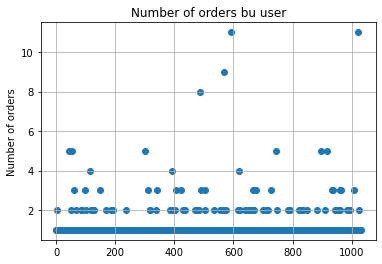

In [27]:
x_values = pd.Series(range(0,len(orders_by_users)))
plt.scatter(x_values, orders_by_users['transaction_id']) 
plt.title('Number of orders bu user')
plt.ylabel('Number of orders')
plt.grid(True)
plt.show()

In [28]:
np.percentile(orders_by_users['transaction_id'], [90, 95, 99])

array([1., 2., 4.])

5% of users made more than 2 orders, and 1% of users made more than 4 orders. To filter out abnormal values, we will choose 4 orders for the upper limit, according to 99 percentile:

In [29]:
orders_percentile = np.percentile(orders_by_users['transaction_id'], [99])[0]

#### Order's amount

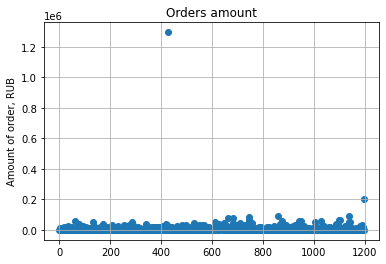

In [30]:
x_values = pd.Series(range(0,len(orders)))

plt.scatter(x_values, orders['revenue'])
plt.title('Orders amount')
plt.ylabel('Amount of order, RUB')
plt.grid(True)
plt.show()

There are two very notable outliers. Let's see dates of this orders and to wich experemental group they belonged.

In [31]:
orders.query('revenue > 200000')[['date','revenue','group']]

,date,revenue,group
425,2019-08-19,1294500,B
1196,2019-08-15,202740,B


These abnormal orders exceed the rest by many times in value, one of them is more than a hundred times, and both orders belong to group B. Their dates coincide in time with the jump of average order value in group B.

Next, we define the boundaries of the anomalous values. For clarity, we will build the same graph with a scale of the cost of orders up to 100,000.

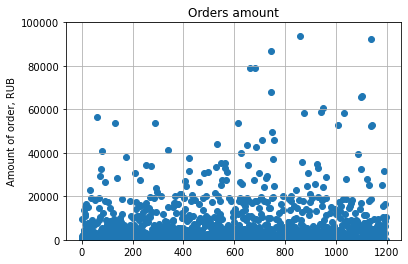

In [32]:
plt.scatter(x_values, orders['revenue'])
plt.title('Orders amount')
plt.ylabel('Amount of order, RUB')
plt.ylim(0,100000)
plt.grid(True)
plt.show()

In [33]:
np.percentile(orders['revenue'], [90, 95, 99])

array([18168. , 28000. , 58233.2])

Let's define the boundary for abnormal orders in 58233.2rubles, corresponding to 99% of orders:

In [34]:
revenue_percentile = np.percentile(orders['revenue'], [99])[0]

### Statistical significance between groups based on "raw" data

#### Stat.significance in average number of orders

Let's compare average number of order for all users, include users without any order.

Let's formulate hypotheses.

- H0: there are no differences in the average number of orders between groups A and B.
- H1: there are differences in the average number of orders between groups A and B.

Let's take the level of statistical significance: 0.05

We will prepare tables by groups with the number of visitors and the number of orders for users who have made at least one order.

In [35]:
#Tables of visitors by date
visitors_a_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_a_daily.columns = ['date', 'visitors_per_date_a']

visitors_b_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_b_daily.columns = ['date', 'visitors_per_date_b']

#Tables of number of orders grouped by visitors made at least one order
orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_a.columns = ['user_id', 'orders']


orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_b.columns = ['user_id', 'orders']

Let's form tables by groups with the number of orders of all visitors, including those who have not made any order.

In [36]:
sample_a = pd.concat([orders_by_users_a['orders'],
                     pd.Series(0,
                               index=np.arange(visitors_a_daily['visitors_per_date_a'].sum()\
                                               - len(orders_by_users_a['orders'])),
                               name='orders')],
                    axis=0)

sample_b = pd.concat([orders_by_users_b['orders'],
                     pd.Series(0,
                               index=np.arange(visitors_b_daily['visitors_per_date_b'].sum()\
                                               - len(orders_by_users_b['orders'])),
                               name='orders')],
                    axis=0)

Let's apply the Mann Whitney test and output p-value, and also output the relative increase in the average number of orders of group B:

In [37]:
print("P-Value: {0:.5f}".format(stats.mannwhitneyu(sample_a, sample_b)[1]))

if stats.mannwhitneyu(sample_a, sample_b)[1] <= 0.05:
    print('There are reasons to reject the null hypothesis')
else:
    print('There are no reasons to reject the null hypothesis')
    
print("Relative increase in the average number of Group B orders: {0:.3f}"
      .format(sample_b.mean() / sample_a.mean() - 1))

P-Value: 0.01679
There are reasons to reject the null hypothesis
Relative increase in the average number of Group B orders: 0.138


According to the "raw" data, Group B received a relative increase in the number of orders of 13.8%, while the differences are statistically significant.

If the results are confirmed on "pure" data, we can conclude that the hypothesis tested by the A/B test has been confirmed.

#### Statistical significance in average order value

Let's formulate hypothesis.

- H0: there are no significant differences in the average order value between groups A and B.
- H1: there are significant differences in the average order value between groups A and B.

Let's take the level of statistical significance: 0.05

In [38]:
sample_a = orders.query('group == "A"')['revenue']

sample_b = orders.query('group == "B"')['revenue']

In [39]:
print("P-Value: {0:.5f}".format(stats.mannwhitneyu(sample_a, sample_b)[1]))

if stats.mannwhitneyu(sample_a, sample_b)[1] <= 0.05:
    print('There are reasons to reject the null hypothesis')
else:
    print('There are no reasons to reject the null hypothesis')
    
print("Relative increase in the average order value of the group B: {0:.3f}"
      .format(sample_b.mean() / sample_a.mean() - 1))

P-Value: 0.72929
There are no reasons to reject the null hypothesis
Relative increase in the average order value of the group B: 0.259


The increase is quite large: 26% However, P-Value according to the results of the Mann-Whitney test does not allow us to say that the differences are statistically significant. Next, we will see if the results will change on the "clean" data.

### Statistical significance between groups based on "clean" data

#### Stat.significance in average number of orders

Let's formulate hypotheses.

- H0: there are no differences in the average number of orders between groups A and B.
- H1: there are differences in the average number of orders between groups A and B.

The level of statistical significance: 0.05

We will prepare data on the number of orders, taking into account the previously defined boundary of abnormal values in 3 orders.

In [40]:
sample_a = pd.concat([orders_by_users_a.query('orders <= @orders_percentile')['orders'],
                     pd.Series(0,
                               index=np.arange(visitors_a_daily['visitors_per_date_a'].sum()\
                                               - len(orders_by_users_a['orders'])),
                               name='orders')],
                    axis=0)

sample_b = pd.concat([orders_by_users_b.query('orders <= @orders_percentile')['orders'],
                     pd.Series(0,
                               index=np.arange(visitors_b_daily['visitors_per_date_b'].sum()\
                                               - len(orders_by_users_b['orders'])),
                               name='orders')],
                    axis=0)

In [41]:
print("P-Value: {0:.5f}".format(stats.mannwhitneyu(sample_a, sample_b)[1]))

if stats.mannwhitneyu(sample_a, sample_b)[1] <= 0.05:
    print('There are reasons to reject the null hypothesis')
else:
    print('There are no reasons to reject the null hypothesis')
    
print('Relative increase in the average number of orders of the group B: {0:.3f}'
      .format(sample_b.mean() / sample_a.mean() - 1))

P-Value: 0.01516
There are reasons to reject the null hypothesis
Relative increase in the average number of orders of the group B: 0.154


Here in "clean" data the relative increase in Group B is higher by 1% then in "raw" data and P-value is comparable.

Group B showed better and statistically significant results on the average number of orders than group A, which follows from both "cleaned" and "raw" data.

#### Statistical significance in average order value

Let's formulate hypothesis.

- H0: there are no significant differences in the average order value between groups A and B.
- H1: there are significant differences in the average order value between groups A and B.

Let's take the level of statistical significance: 0.05

Preparing date taking into account the prevosly defined boundary of abnormal values in 40 0000 RUB (=percentile 99).

In [42]:
sample_a = orders.query('group == "A" and revenue <= @revenue_percentile')['revenue']

sample_b = orders.query('group == "B" and revenue <= @revenue_percentile')['revenue']

In [43]:
print("P-Value: {0:.5f}".format(stats.mannwhitneyu(sample_a, sample_b)[1]))

if stats.mannwhitneyu(sample_a, sample_b)[1] <= 0.05:
    print('here are reasons to reject the null hypothesis')
else:
    print('There are no reasons to reject the null hypothesis')
    
print("Relative increase in the average order value of the group B: {0:.3f}: {0:.3f}"
      .format(sample_b.mean() / sample_a.mean() - 1))

P-Value: 0.62086
There are no reasons to reject the null hypothesis
Relative increase in the average order value of the group B: 0.019: 0.019


"Clean" data shows more modest relative increase in the AOV: 1.9% But P-value still indicates that the differences are not statistically significant.

### Conclusions

1. The origin data indicate that 5.6% of the users who made orders fell into both Group A and Group B. The analysis of the A/B test was carried out taking them into account.


2. A number of abnormal orders were identified, especially two orders with amounts of more than 200,000 rubles and more than 1,200,000 rubles. The analysis of statistical significance was carried out both with and without their consideration.


3. Conclusions about the differences in the average order value in group A and B:
- The relative increase in the AOV in group B was 26% in accordance with the "row" data and 1.9% in accordance with the "clean" data excluding abnormal orders;
- Both in the "row" data and in the "clean" data the differences in the average check are not statistically significant;
- Since the dynamics of the AOV in group B has stabilized by mid-August (if we do not take into account the jump caused by abnormal orders) and further shows a tendency to gradually decrease, the test can be stopped and, based on the results of the analysis, there are no statistically significant differences between the groups.

4. Conclusions about differences in the average number of orders:
- The relative increase in the average number of Group B orders was 13.8% according to the "row" data and 15% according to the data excluding abnormal users who made more than 4 orders;
- Both in the origin data and in the "clean" data the differences in the average number of orders are statistically significant;
- Since the dynamics of the average number of orders in group B has stabilized and shows a stable increase relative to group A, the test can be stopped and, in accordance with the presence of statistically significant differences, record the victory of group B.